In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import cactas as C
import tensorflow as tf
import pickle

2024-06-02 13:52:02.666009: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [3]:
DATAPATH='/raid/mpsych/CACTAS/DATA/ESUS'
CAPATH='/raid/mpsych/CACTAS/DATA/CA24'

In [4]:
images, labels = C.Helper.load_data(DATAPATH)

In [5]:
masks = C.Helper.load_seg_data(CAPATH)

In [6]:
X_train, y_train, m_train, X_test, y_test, m_test = C.Helper.split_patients_masks(images, labels, masks)

In [7]:
with open('unet_27/train_patient_order.pkl', 'wb') as f:
    pickle.dump(X_train, f)
with open('unet_27/test_patient_order.pkl', 'wb') as f:
    pickle.dump(X_test, f)

In [8]:
X_train, y_train, m_train, X_test, y_test, m_test = C.Helper.normalization2(DATAPATH, CAPATH, X_train, y_train, m_train, X_test, y_test, m_test)

In [9]:
slice_to_patient_mapping, last_key = C.Helper.map_and_key_fulldata(y_train)

10915


In [10]:
X_train, y_train, X_test, y_test = C.Helper.extract_slices(X_train, y_train, X_test, y_test)

(13328, 512, 512, 1) (13328, 512, 512, 1) (3438, 512, 512, 1) (3438, 512, 512, 1)


In [11]:
m_train, m_test = C.Helper.extract_masks_slices(m_train, m_test)

(13328, 512, 512, 1) (3438, 512, 512, 1)


In [12]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
m_train = m_train.astype(np.float32)
m_test = m_test.astype(np.float32)

In [13]:
train_images_array, test_images_array = C.Helper.masked_image(X_train, m_train, X_test, m_test)

(13328, 512, 512, 1) (3438, 512, 512, 1)


In [14]:
X_train_set = train_images_array[:last_key]
y_train_set = y_train[:last_key]
X_val = train_images_array[last_key:]
y_val = y_train[last_key:]

In [15]:
model = C.Helper.create_unet(X_train_set[0].shape)

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


2024-06-02 13:55:27.389400: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2024-06-02 13:55:27.643708: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:90:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2024-06-02 13:55:27.646340: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:bd:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2024-06-02 13:55:27.646366: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2024-06-02 13:55:27.695282: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2024-06-02 

In [16]:
model.save('unet_27/unet_model.h5')

In [17]:
model, history = C.Helper.train_unet(X_train_set, y_train_set, X_val, y_val, model, epochs=200)

2024-06-02 13:55:30.901973: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2024-06-02 13:55:30.905014: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245740000 Hz


Epoch 1/200


2024-06-02 13:55:32.564521: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2024-06-02 13:55:33.739134: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2024-06-02 13:55:35.307243: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2024-06-02 13:55:35.307268: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2024-06-02 13:55:35.308015: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2024-06-02 13:55:35.395532: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2024-06-02 13:55:36.911048: I tensorflow/stream_exec

682/682 [==============================] - 322s 450ms/step - loss: 0.0853 - iou: 3.5190e-05 - iou_thresholded: 0.4113 - val_loss: 0.0029 - val_iou: 9.4844e-05 - val_iou_thresholded: 0.8819
Epoch 2/200
682/682 [==============================] - 307s 445ms/step - loss: 0.0015 - iou: 2.3571e-04 - iou_thresholded: 0.5405 - val_loss: 7.6640e-04 - val_iou: 5.6567e-04 - val_iou_thresholded: 0.7877
Epoch 3/200
682/682 [==============================] - 303s 445ms/step - loss: 4.9652e-04 - iou: 7.7834e-04 - iou_thresholded: 0.5408 - val_loss: 3.5993e-04 - val_iou: 8.1104e-04 - val_iou_thresholded: 0.8819
Epoch 4/200
682/682 [==============================] - 304s 445ms/step - loss: 2.5924e-04 - iou: 0.0014 - iou_thresholded: 0.5423 - val_loss: 1.9257e-04 - val_iou: 0.0019 - val_iou_thresholded: 0.7906
Epoch 5/200
682/682 [==============================] - 303s 445ms/step - loss: 1.5779e-04 - iou: 0.0027 - iou_thresholded: 0.4953 - val_loss: 1.6253e-04 - val_iou: 0.0026 - val_iou_thresholded: 0.

682/682 [==============================] - 303s 444ms/step - loss: 1.1459e-05 - iou: 0.3114 - iou_thresholded: 0.7164 - val_loss: 4.9564e-05 - val_iou: 0.5279 - val_iou_thresholded: 0.8412
Epoch 42/200
682/682 [==============================] - 303s 445ms/step - loss: 1.4083e-05 - iou: 0.2881 - iou_thresholded: 0.6676 - val_loss: 4.3563e-05 - val_iou: 0.5493 - val_iou_thresholded: 0.8300
Epoch 43/200
682/682 [==============================] - 303s 444ms/step - loss: 1.1025e-05 - iou: 0.3152 - iou_thresholded: 0.6955 - val_loss: 4.2196e-05 - val_iou: 0.5320 - val_iou_thresholded: 0.8436
Epoch 44/200
682/682 [==============================] - 303s 444ms/step - loss: 1.4592e-05 - iou: 0.2734 - iou_thresholded: 0.6687 - val_loss: 4.3676e-05 - val_iou: 0.4717 - val_iou_thresholded: 0.8081
Epoch 45/200
682/682 [==============================] - 303s 444ms/step - loss: 1.0857e-05 - iou: 0.3346 - iou_thresholded: 0.7244 - val_loss: 5.1825e-05 - val_iou: 0.4836 - val_iou_thresholded: 0.7966
Epo

Epoch 82/200
682/682 [==============================] - 303s 445ms/step - loss: 4.9510e-06 - iou: 0.6597 - iou_thresholded: 0.8393 - val_loss: 5.8965e-05 - val_iou: 0.7505 - val_iou_thresholded: 0.8437
Epoch 83/200
682/682 [==============================] - 303s 445ms/step - loss: 4.8950e-06 - iou: 0.6515 - iou_thresholded: 0.8510 - val_loss: 4.7119e-05 - val_iou: 0.7362 - val_iou_thresholded: 0.8325
Epoch 84/200
682/682 [==============================] - 303s 444ms/step - loss: 5.2060e-06 - iou: 0.6544 - iou_thresholded: 0.8470 - val_loss: 5.8108e-05 - val_iou: 0.7292 - val_iou_thresholded: 0.8493
Epoch 85/200
682/682 [==============================] - 303s 444ms/step - loss: 4.9627e-06 - iou: 0.6610 - iou_thresholded: 0.8479 - val_loss: 5.7716e-05 - val_iou: 0.7432 - val_iou_thresholded: 0.8511
Epoch 86/200
682/682 [==============================] - 303s 444ms/step - loss: 4.4315e-06 - iou: 0.6828 - iou_thresholded: 0.8515 - val_loss: 5.1483e-05 - val_iou: 0.7463 - val_iou_thresholde

682/682 [==============================] - 302s 443ms/step - loss: 2.7901e-06 - iou: 0.8203 - iou_thresholded: 0.9072 - val_loss: 6.9197e-05 - val_iou: 0.7623 - val_iou_thresholded: 0.8211
Epoch 123/200
682/682 [==============================] - 303s 444ms/step - loss: 3.2084e-06 - iou: 0.7925 - iou_thresholded: 0.8861 - val_loss: 6.9934e-05 - val_iou: 0.7881 - val_iou_thresholded: 0.8470
Epoch 124/200
682/682 [==============================] - 302s 444ms/step - loss: 2.9992e-06 - iou: 0.8189 - iou_thresholded: 0.9024 - val_loss: 7.2988e-05 - val_iou: 0.7953 - val_iou_thresholded: 0.8415
Epoch 125/200
682/682 [==============================] - 303s 444ms/step - loss: 3.0951e-06 - iou: 0.8257 - iou_thresholded: 0.8990 - val_loss: 7.7942e-05 - val_iou: 0.7800 - val_iou_thresholded: 0.8276
Epoch 126/200
682/682 [==============================] - 303s 444ms/step - loss: 3.2509e-06 - iou: 0.8150 - iou_thresholded: 0.8938 - val_loss: 7.1439e-05 - val_iou: 0.7596 - val_iou_thresholded: 0.8201

682/682 [==============================] - 303s 445ms/step - loss: 1.5879e-06 - iou: 0.8948 - iou_thresholded: 0.9413 - val_loss: 9.9332e-05 - val_iou: 0.7839 - val_iou_thresholded: 0.8093
Epoch 163/200
682/682 [==============================] - 303s 444ms/step - loss: 1.6455e-06 - iou: 0.9063 - iou_thresholded: 0.9486 - val_loss: 1.0220e-04 - val_iou: 0.8025 - val_iou_thresholded: 0.8164
Epoch 164/200
682/682 [==============================] - 303s 445ms/step - loss: 1.5305e-06 - iou: 0.9192 - iou_thresholded: 0.9520 - val_loss: 9.8670e-05 - val_iou: 0.8095 - val_iou_thresholded: 0.8246
Epoch 165/200
682/682 [==============================] - 303s 444ms/step - loss: 1.5486e-06 - iou: 0.9079 - iou_thresholded: 0.9453 - val_loss: 1.0369e-04 - val_iou: 0.7750 - val_iou_thresholded: 0.8116
Epoch 166/200
682/682 [==============================] - 303s 445ms/step - loss: 1.5592e-06 - iou: 0.9144 - iou_thresholded: 0.9505 - val_loss: 1.0934e-04 - val_iou: 0.7987 - val_iou_thresholded: 0.8276

In [18]:
with open('unet_27/training_history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

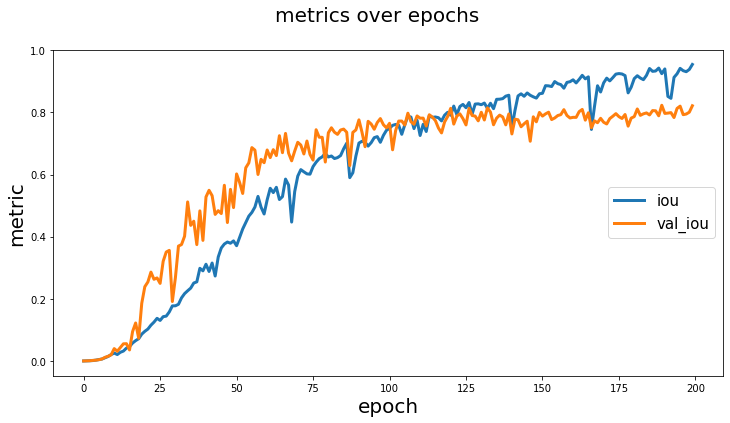

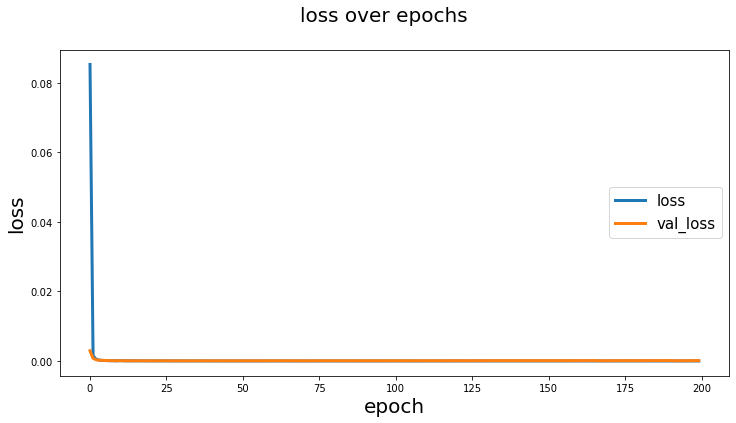

In [19]:
C.Helper.visualize_graph(history)

In [20]:
y_pred = C.Helper.prediction(test_images_array, model)

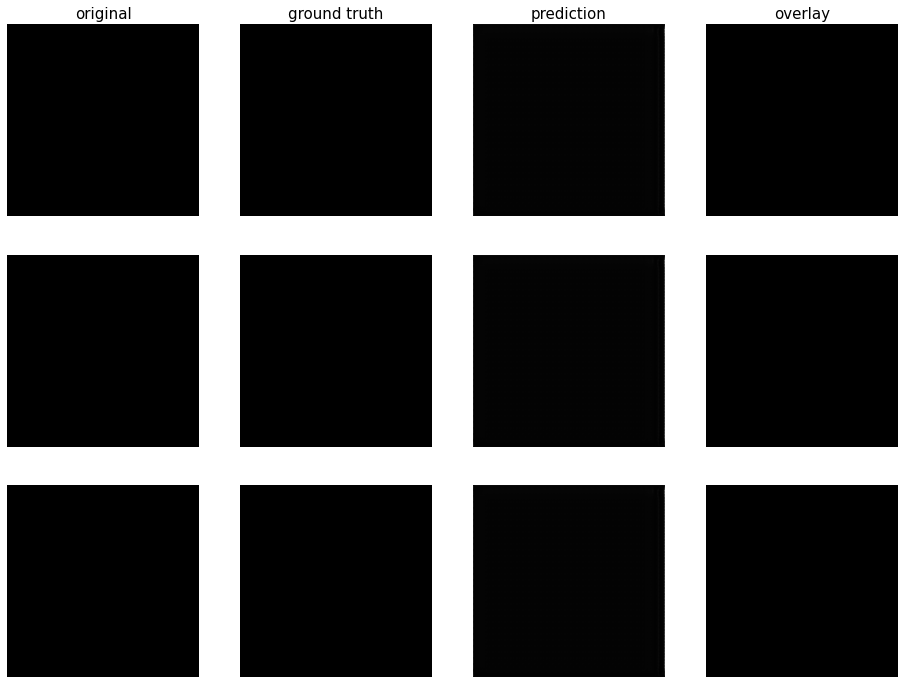

In [21]:
C.Helper.visualize_result(test_images_array, y_test, y_pred)

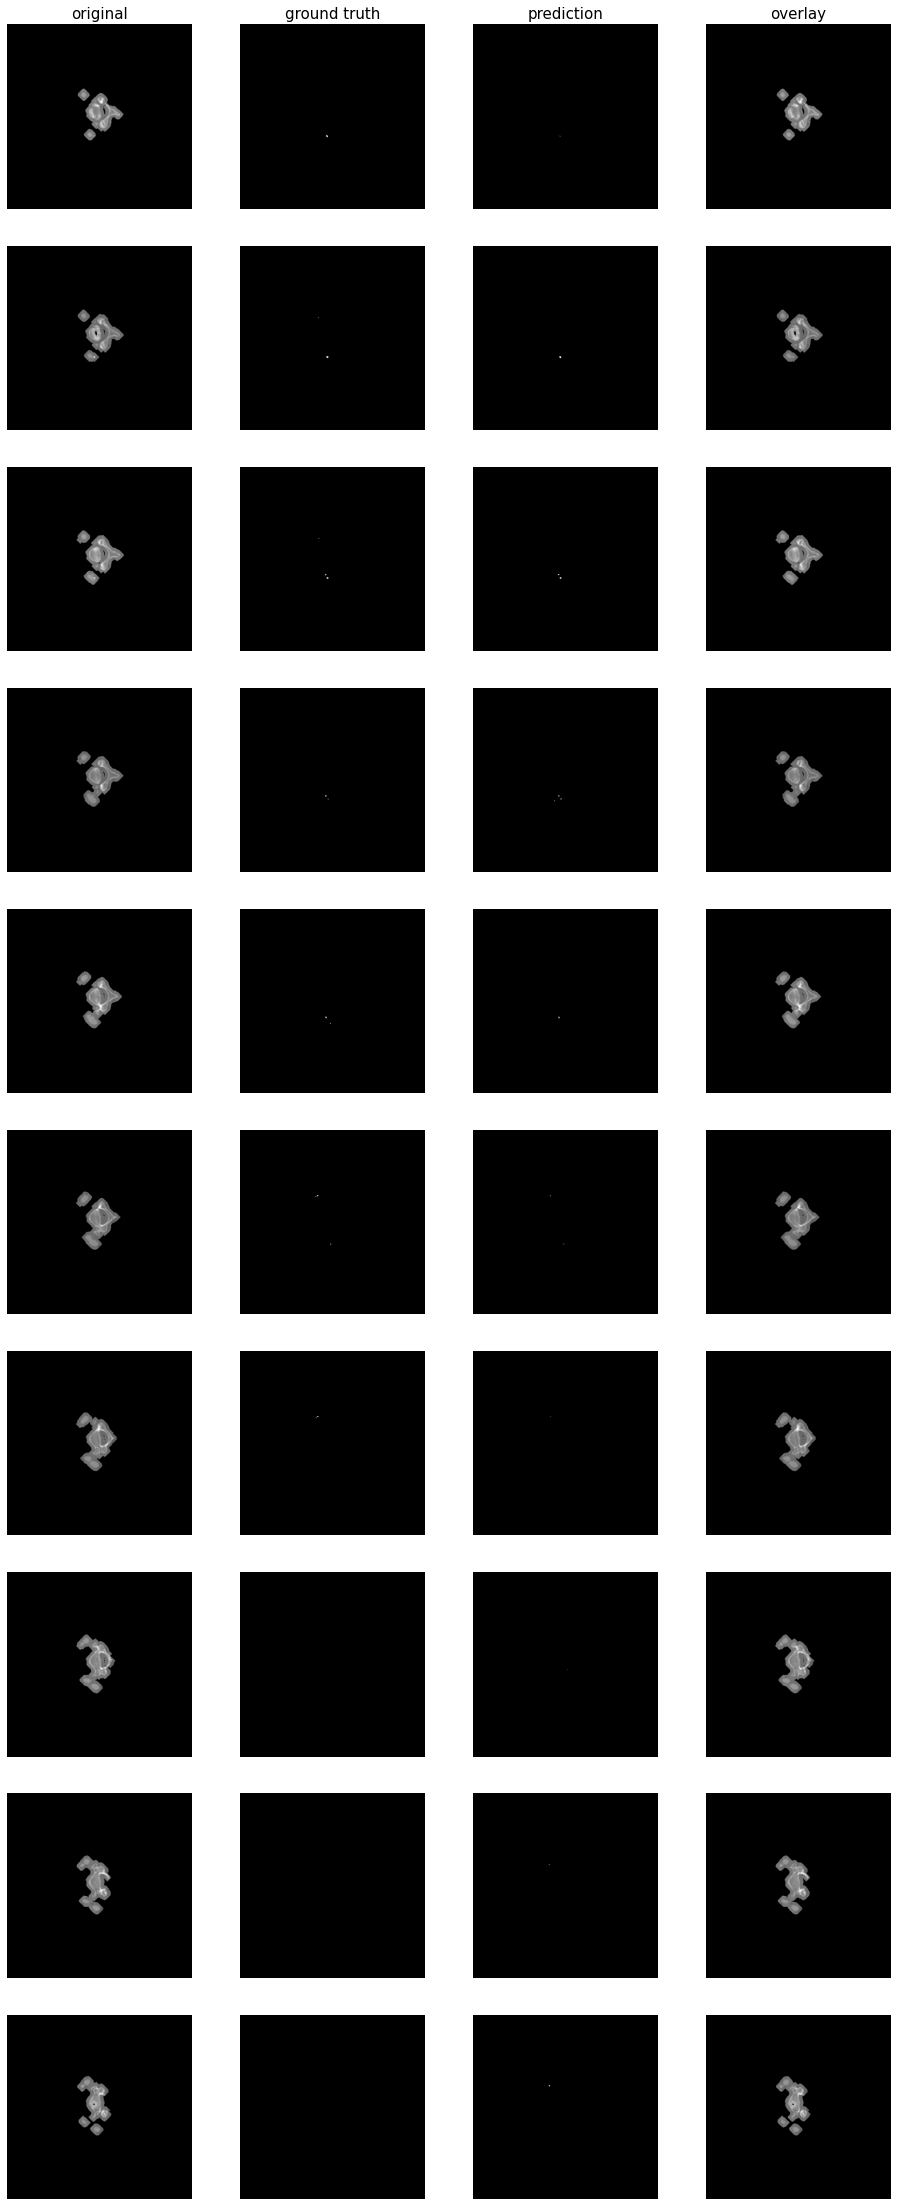

In [44]:
C.Helper.visualize_result_limit(test_images_array, y_test, y_pred, start_index=355, end_index=365)

In [23]:
C.Helper.evaluate(test_images_array, y_test, model)

108/108 [==============================] - 27s 253ms/step - loss: 8.2700e-05 - iou: 0.7673 - iou_thresholded: 0.7835


In [24]:
a = y_pred
a_binary = np.zeros(a.shape, dtype=np.bool_)
a_binary[a > 0.5] = True

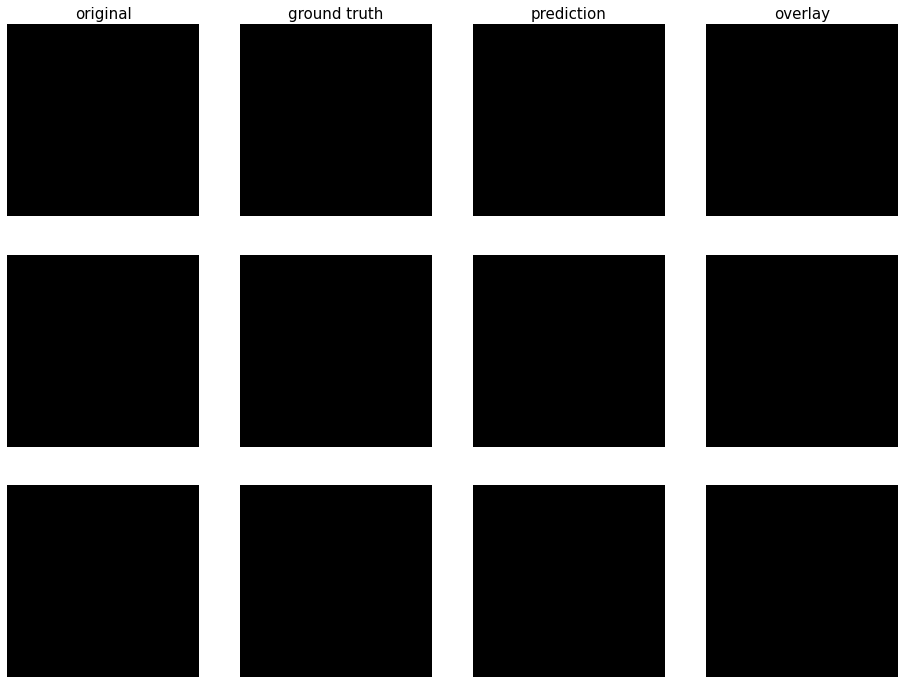

In [25]:
C.Helper.visualize_result(test_images_array, y_test, a_binary)

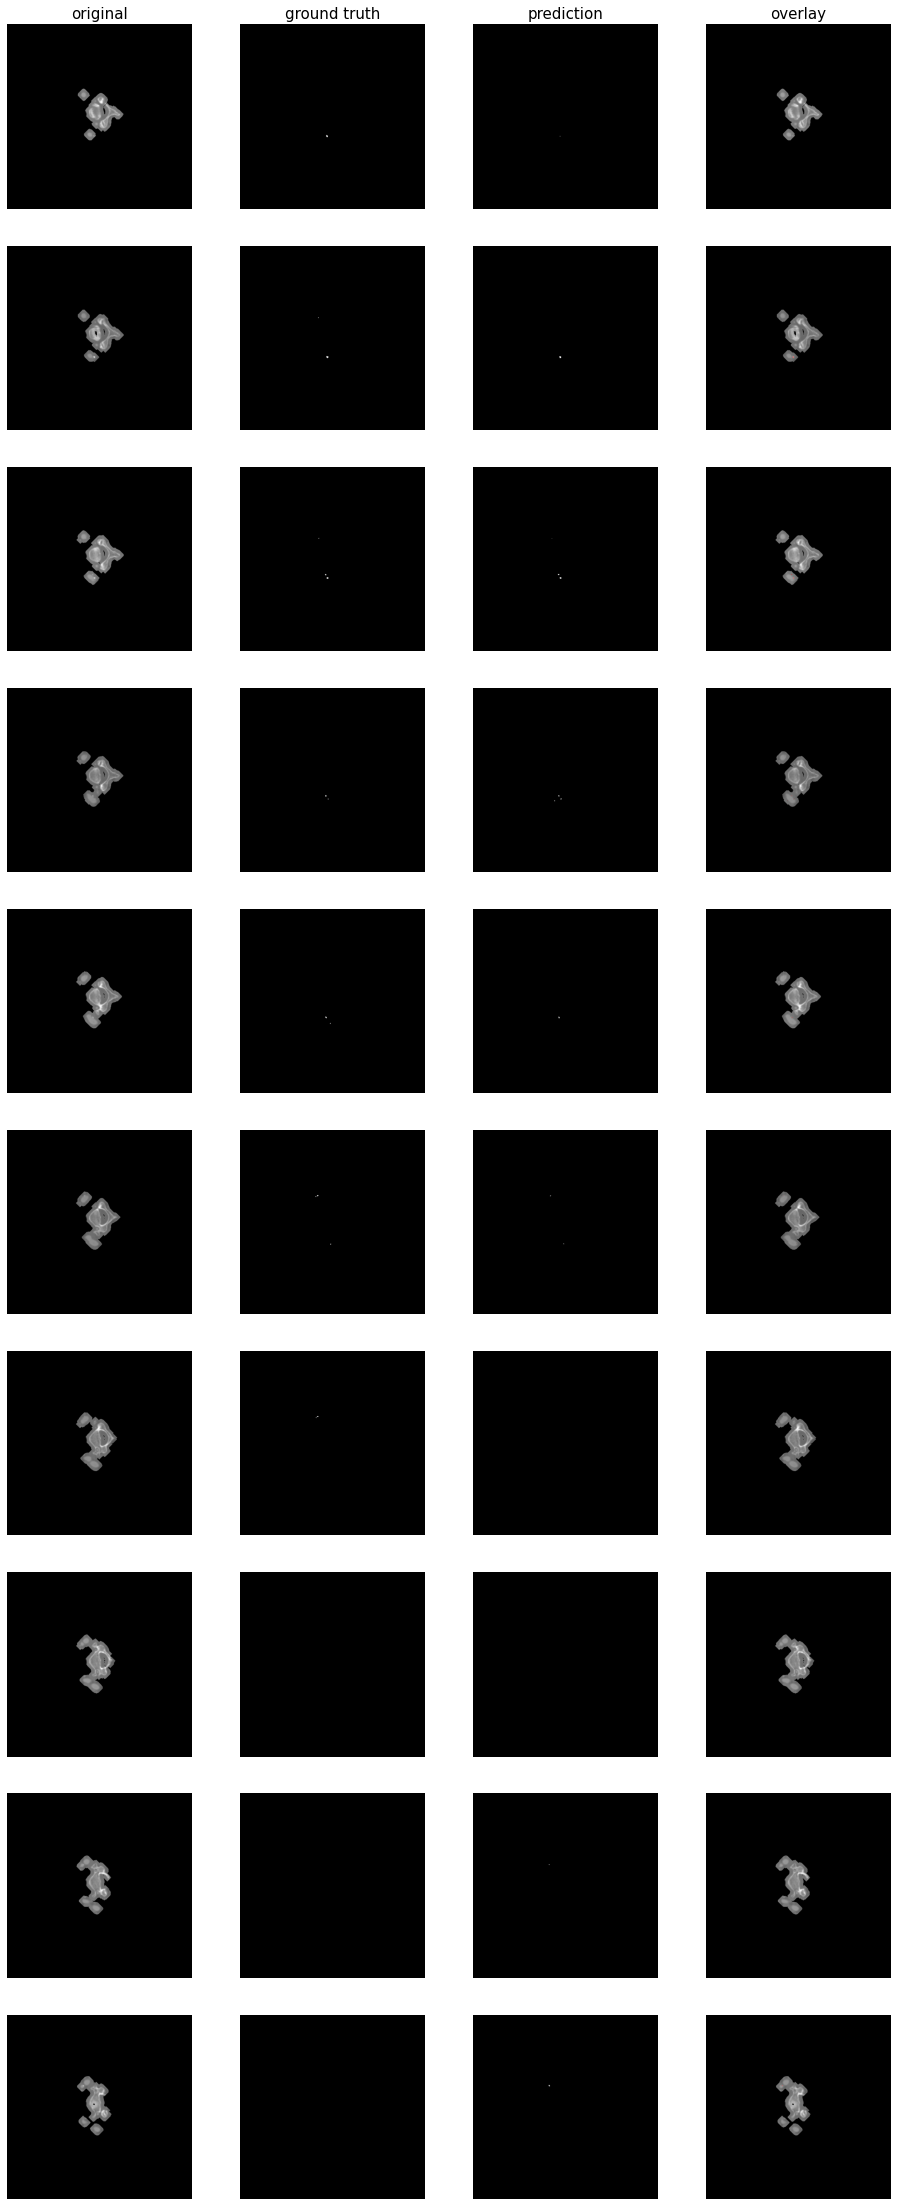

In [45]:
C.Helper.visualize_result_limit(test_images_array, y_test, a_binary, start_index=355, end_index=365)

In [27]:
C.Helper.evaluate(test_images_array, a_binary, model)

108/108 [==============================] - 27s 252ms/step - loss: 7.6926e-07 - iou: 0.9412 - iou_thresholded: 1.0000


In [28]:
experiment_data = {
    'slice_to_patient_mapping': slice_to_patient_mapping,
    'last_key': last_key,
    'predictions': y_pred,
    'y_pred_threshold': a_binary
}

In [29]:
experiment_data_path = 'unet_27/experiment_data.pkl'

In [30]:
with open(experiment_data_path, 'wb') as f:
    pickle.dump(experiment_data, f)